In [1]:
import pandas as pd

df = pd.read_csv('./data/naver_shopping_tokenized_review_and_prediction_by_models.csv', sep = ',', encoding = 'utf-8', index_col = 0)
print(len(df))
print(df.dtypes)
df.head()

199572
Score                    int64
Review                  object
y                        int64
tokenized_1             object
tokenized_2             object
DTM_tk1_prediction       int64
TFIDF_tk1_prediction     int64
DTM_tk2_prediction       int64
TFIDF_tk2_prediction     int64
dtype: object


,Score,Review,y,tokenized_1,tokenized_2,DTM_tk1_prediction,TFIDF_tk1_prediction,DTM_tk2_prediction,TFIDF_tk2_prediction
0,5,배공빠르고 굿,1,배공 빠르고,배공 빠르고 굿,1,1,1,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0,택배 엉망 놔두고가고,택배 엉망 이네 용 집 밑 층 없이 놔두고가고,0,0,0,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 박음질이 조금 ...,1,아주 좋아요 바지 정말 좋아서 구매 가격 대박 입니다 박음질 어설프다하긴 편하고 가...,아주 좋아요 바지 정말 좋아서 2 구매 가격 대박 입니다 . 박음질 어설프다하긴 편...,1,1,1,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0,선물 받아서 전달 했어야 하는 상품 이었는데 머그컵 와서 당황 했습니다 전화했더니 ...,선물 용 빨리 받아서 전달 했어야 하는 상품 이었는데 머그컵 와서 당황 했습니다 ....,0,0,0,0
4,5,민트색상상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1,민트 색상 예뻐요 손잡이 도로 사용 되네요,민트 색상 예뻐요 . 손잡이 는 는 용 도로 사용 되네요 ㅎㅎ,1,1,1,1


## 'y ≠ tfidf_tk1_pred' & 'y = tfidf_tk2_pred' 인 경우   (4,799 건)
- token1로 예측한 것은 틀렸지만, token2로 예측한 것은 맞은 경우

In [2]:
df2 = df[(df['y'] != df['TFIDF_tk1_prediction']) &
         (df['y'] == df['TFIDF_tk2_prediction'])]
print(len(df2))
df2.head()

4799


,Score,Review,y,tokenized_1,tokenized_2,DTM_tk1_prediction,TFIDF_tk1_prediction,DTM_tk2_prediction,TFIDF_tk2_prediction
66,5,시간이 지나도 접착력이 그대로예요~~,1,지나도 접착 그대로,지나도 접착 력 그대로 예요 ~~,0,0,1,1
67,5,괜찮네yo!,1,괜찮네,괜찮네 yo !,0,0,1,1
78,5,한사이즈 크게 시켰는데 잘 맞아요ㅋㅋㅋ,1,사이즈 크게 시켰는데 맞아요,사이즈 크게 시켰는데 잘 맞아요 ㅋㅋㅋ,0,0,1,1
116,5,왜 승무원 스프레이라고하는지 알겠네요 짱이에요. 흡수력 광택 @@,1,승무원 스프레이 하는지 알겠네요 흡수 광택,승무원 스프레이 라고 하는지 알겠네요 짱 이에요 . 흡수 력 광택 @@,0,0,1,1
155,2,지속력만 좀 좋으면 너무 좋을가 같아요,0,지속 좋으면 좋을가 같아요,지속 력 좋으면 너무 좋을가 같아요,1,1,0,0


In [3]:
df2 = df2[['y', 'tokenized_1', 'tokenized_2', 'TFIDF_tk1_prediction', 'TFIDF_tk2_prediction']]
df2.head()

,y,tokenized_1,tokenized_2,TFIDF_tk1_prediction,TFIDF_tk2_prediction
66,1,지나도 접착 그대로,지나도 접착 력 그대로 예요 ~~,0,1
67,1,괜찮네,괜찮네 yo !,0,1
78,1,사이즈 크게 시켰는데 맞아요,사이즈 크게 시켰는데 잘 맞아요 ㅋㅋㅋ,0,1
116,1,승무원 스프레이 하는지 알겠네요 흡수 광택,승무원 스프레이 라고 하는지 알겠네요 짱 이에요 . 흡수 력 광택 @@,0,1
155,0,지속 좋으면 좋을가 같아요,지속 력 좋으면 너무 좋을가 같아요,1,0


In [4]:
corpus_1 = ''.join(df2['tokenized_1'].tolist())
corpus_1

'지나도 접착 그대로괜찮네사이즈 크게 시켰는데 맞아요승무원 스프레이 하는지 알겠네요 흡수 광택지속 좋으면 좋을가 같아요먹어요후기 좋아서 구매 외관 케이스 따갑다 큼하고 있는데 치약 편이 쓴맛 써서 신랑 맞는거 같아요상품 배송운동복 사이즈 신는데 주문 했더니 작아서 교환세제 보지 않았어요 섬유 유연제 진합니다 짜리 동전 넣고 사용 하고있습니다비싸요 잇네요 번창 하세요전체 대가 약해 보임 가격 비해 수납 공간 괜찮았습니다그렇다 대충 담아놓기만 해도 지저분한게 따갑다 해지 마법 좋아요 견고합이다고구마 맞네요 포장 정말 따갑다어어 닌네에에재구매 엄마 알로 많다 좋아하셔서 주문 해서 먹고 단골 쿠폰 받았답니다 평소 대량 주문 했는데 엄마 받아 보시 잘려오고 두지 할것 같아 상품 좋지 하다고 하시네요쓰면 너덜너덜해져요처음 연결 되지 않아 시도 하다가 수동 입력 간혹 끊기는 증상 있어서 개입배송 예상 날짜 도착샀다 생각 하네요 잘쓸게요샀는데 어유변하지 않는 돌이밀키스 비슷한 같아요수평 맞긴하는데 예쁘긴 합다색상 상이 흰색 상상 더라면 좋을 크기 작은데 결부 헐겁지 않다면 만족 입니다알러지 케어 했는데 아들 재채기 거나 비염 증상 세탁 살균 건조기 다해 봤는데 덮는 중이랜덤 배송 충격 이었으나 분홍색 좋아하는 로서 뽑기 성공마약 냄새 다도 적고 머리 손상 없는거 같아요 방치 해야 머리펌 나올것 같아요허벅지 엉덩이 커서 라지 했는데 맞아요 밑위 짧네요 워터파크 필수달용 없는듯 생긴거 다르게 생각 써요소간 먹는데 뚱뚱하다하다 딱딱해서 그런지 먹네요 불려서 먹여 볼려 많아요생각 강해서 한번 제대로 해보고나서 구매 결정 할것 같아요거치 사이즈 맞네요 사용 합니다피부 맑아가격 하네요 받았습니다디디배송 세척 하는데 사진 하자있네요 닦여요 물건 좋아요냄새 나다 잡아주고 좋아해요 브리 버렸어요생각 작아서 황당해요 사고싶었는대 리도 작을수가요 품질 좋아요찮아요 쓸라 합니다좋아함손상 심해서 소문 듣고 구매 몇번 사용 했는데도 좋아진것 같아요 정도 사용 좋아질것 같네요생각 보장 돼서 온거 같아

In [5]:
from wordcloud import WordCloud

wc = WordCloud(
    font_path = 'malgun',
    background_color = 'white',
    max_words = 2000
)
wc = wc.generate(corpus_1)
wc.words_

{'사용': 1.0,
 '배송': 0.8446215139442231,
 '구매': 0.7131474103585658,
 '많다': 0.6693227091633466,
 '생각': 0.6254980079681275,
 '가격': 0.6215139442231076,
 '제품': 0.6135458167330677,
 '같아요': 0.5657370517928287,
 '사이즈': 0.5577689243027888,
 '좋아요': 0.5418326693227091,
 '했는데': 0.4820717131474104,
 '해서': 0.46215139442231074,
 '그렇다': 0.40239043824701193,
 '정말': 0.3944223107569721,
 '색상': 0.38247011952191234,
 '정도': 0.3705179282868526,
 '주문': 0.3665338645418327,
 '샀는데': 0.3545816733067729,
 '부분': 0.3466135458167331,
 '포장': 0.32270916334661354,
 '입니다': 0.3107569721115538,
 '한번': 0.28286852589641437,
 '효과': 0.26693227091633465,
 '다시': 0.2589641434262948,
 '느낌': 0.2589641434262948,
 '상품': 0.2549800796812749,
 '좋은데': 0.24302788844621515,
 '좋은': 0.24302788844621515,
 '쓰고': 0.23904382470119523,
 '좋아요 좋아요': 0.21912350597609562,
 '크기': 0.21115537848605578,
 '계속': 0.20717131474103587,
 '않고': 0.20717131474103587,
 '주문 했는데': 0.20318725099601595,
 '보고': 0.1952191235059761,
 '디자인': 0.1952191235059761,
 '아기': 0.18

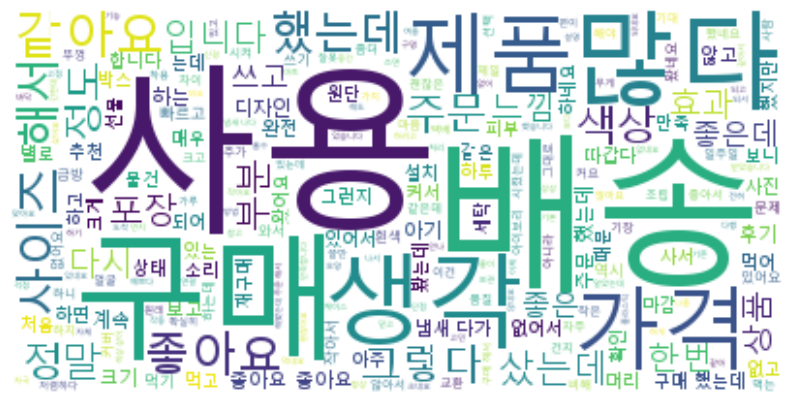

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show();

In [7]:
corpus_2 = ''.join(df2['tokenized_2'].tolist())
corpus_2

'지나도 접착 력 그대로 예요 ~~괜찮네 yo !사이즈 크게 시켰는데 잘 맞아요 ㅋㅋㅋ승무원 스프레이 라고 하는지 알겠네요 짱 이에요 . 흡수 력 광택 @@지속 력 좋으면 너무 좋을가 같아요싼 맛 먹어요 ㅋㅋㅋ후기 너무 좋아서 구매 . 외관 케이스 랑은 너무 따갑다 큼하고 있는데 치약 쓴 편이 에요 . 맛 끝 쓴맛 너무 써서 랑 신랑 이랑은 맞는거 같아요 ㅜㅜ상품 good 배송 good운동복 화 220 사이즈 신는데 230 주문 했더니 작아서 교환 .아직 세제 는 써 보지 않았어요 . 섬유 유연제 는 에겐 너무도 진합니다 . 100원 짜리동전만큼 넣고 사용 하고있습니다 .비싸요 .. 맛 잇네요 번창 하세요전체 적 대가 약해 보임 가격 비해 수납 공간 은 괜찮았습니다그렇다 대충 담아놓기만 해도 지저분한게 따갑다 끔 해지 는 마법 ~ 탄 너무 좋아요 엄청 견고합이다고구마 랑은 맞네요 ㅠㅠ 포장 은 정말 따갑다 끔어어 ㅐ 닌네에에 ㅔ 엥재구매 엄마 알로 많다 좋아하셔서 여러 번 주문 해서 먹고 단골 쿠폰 받았답니다 ~ 엔 평소 보다 대량 주문 했는데 엄마 받아 보시 끝 잘려오고 오래 두지 못 할것 같아 상품 만큼 좋지 못 하다고 하시네요 ㅠ쓰면 너덜너덜해져요 ..처음 연결 되지 않아 번 시도 하다가 수동 입력 ~ 간혹 LTE 끊기는 증상 있어서 별 4 개입 니 ~배송 예상 날짜 잘 도착 .너무 잘 샀다 생각 하네요 잘쓸게요 ~5 샀는데 잘 됐 어유 ^^변하지 않는 꾀 돌이 👍밀키스 맛 이랑 비슷한 같아요 ~수평 잘 맞긴하는데 예쁘긴 합다 !색상 상이 흰색 상상 었 더라면 좋을 듯 하고 , 크기 는 작은데 결부 분 헐겁지 않다면 100% 만족 입니다 .알러지 케어 라고 했는데 아들 재채기 거나 비염 증상 서 세탁 살균 건조기 다해 봤는데 못 덮는 중이랜덤 배송 은 충격 적 이었으나 분홍색 좋아하는 로서 는 뽑기 성공 이네 ㅋㅋㅋ파 마약 냄새 다도 적고 머리 손상 없는거 같아요 ~ 근데 오랫동안 방치 해야 머리펌 잘 나올것 같아요허벅지 랑 엉덩이 커서 라지 했는데 잘 

In [8]:
wc = WordCloud(
    font_path = 'malgun',
    background_color = 'white',
    max_words = 2000
)
wc = wc.generate(corpus_2)
wc.words_

{'잘': 1.0,
 '은': 0.7120786516853933,
 '는': 0.5898876404494382,
 '너무': 0.5603932584269663,
 '같아요': 0.2893258426966292,
 '맛': 0.2808988764044944,
 '사용': 0.273876404494382,
 '배송': 0.2612359550561798,
 '못': 0.25702247191011235,
 '좋아요': 0.2556179775280899,
 '가격': 0.24719101123595505,
 '보다': 0.24157303370786518,
 '많다': 0.2401685393258427,
 '구매': 0.23876404494382023,
 '사이즈': 0.21629213483146068,
 '근데': 0.19382022471910113,
 '제품': 0.19241573033707865,
 '서': 0.18258426966292135,
 '생각 보다': 0.1797752808988764,
 '인데': 0.16713483146067415,
 '했는데': 0.16432584269662923,
 '입니다': 0.16151685393258428,
 '해서': 0.1601123595505618,
 '이라': 0.15870786516853932,
 '그렇다': 0.15308988764044945,
 'ㅠ': 0.14747191011235955,
 '재구매': 0.1446629213483146,
 '정말': 0.14185393258426968,
 '하고': 0.13764044943820225,
 '샀는데': 0.13202247191011235,
 '부분': 0.12359550561797752,
 '색상': 0.12219101123595505,
 'ㅠㅠ': 0.11938202247191011,
 '포장': 0.11235955056179775,
 '정도': 0.11095505617977527,
 '아직': 0.10955056179775281,
 '엔': 0.106741573

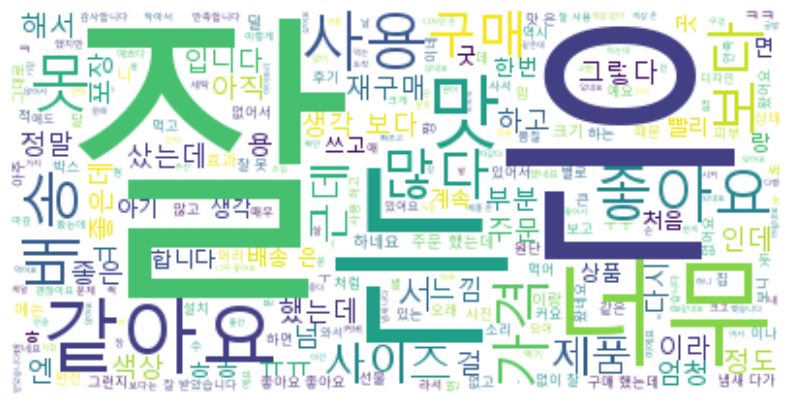

In [9]:
plt.figure(figsize = (10, 10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show();

## 정리

#### 왜 token2(모든 형태소)가 token1(명사, 형용사, 동사) 보다 성능이 좋은가?
- _token1로 잘 예측하지 못한 경우(①)_ 와 _token2로 잘 예측한 경우(②)_ 비교
<br/>①에는 2글자 이상의 token의 발생 빈도가 높은 반면,
<br/>②에는 한 글자 토큰의 발생 빈도가 높았음
<br/>&nbsp;&nbsp;&nbsp;&nbsp;잘, 은, 는, 맛, 못, ㅠ, 넘 등 한 글자 token,
<br/>&nbsp;&nbsp;&nbsp;&nbsp;또는 '너무, ~보다'와 같은 부사,
<br/>&nbsp;&nbsp;&nbsp;&nbsp;'근데(그런데)'와 같은 접속사가 존재

<br/>즉, token2는 의미있는 형태소가 더 잘 추출되었다고 볼 수 있음.